In [56]:
!pip install torch

In [57]:
!pip install progressbar

In [58]:
import progressbar
import seaborn as sns
import torch
import matplotlib
import pandas as pd
import numpy as np
from torch import nn
from torch import optim
from progressbar import ProgressBar
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
matplotlib.style.use('ggplot')
import seaborn as sns

#El DataFrame se encuentra en mi google drive, entonces le damos acceso a google colab a los archivos de drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
#Cargamos nuestra base de datos
data=pd.read_csv('gdrive/My Drive/insurance.csv')

# Descripción

La base de datos fue recabada de [Kaggle : Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance/code), la cual contiene 1338 registros de personas que contratan un seguro médico en Estados Unidos. 

Las variables (columnas)  de nuestra base de datos son:
* age: Edad del beneficiario

* sex: Género de la persona que contrata el seguro.

* bmi: Índice de masa corporal.

* children: Número de hijos cubiertos por el seguro de gastos médicos / Número de personas dependientes. 

* smoker: Indica si la persona fuma o no

* region: El area en la cual el beneficiero es residente (northeast, southeast, southwest, northwest )

* charges: Costos médicos individuales facturados por el seguro médico.


En el presente trabajo se pretende realizar un modelo de regresión lineal para estimar la variable charges a partir de las otras. 

A continuación se hará un análisis exploratorio y estadístico de los datos para saber de que manera afectan a la variable que deseamos predecir. 


In [60]:
#Visualizar los primeros renglones
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
#Observamos que no tenemos ningún valor nulo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
#Checamos si hay renglones duplicados
data.duplicated()
#Efectivamente no hay renglones duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

Empezamos con la descripción de los datos. 

Nos indica que efectivamente hay 1338 datos de edad(age), bmi (índice de masa corporal), children (hijos) y charges (cargos) .

Tambien nos arroja la media de dichas variables, al igualq ue la desviación estandar. 

Además, nos indica cual es le valor mínimo, máximo y los valores de los cuantiles correspondientes al 25,50,75 porciento

In [63]:
#Descripción de los datos
#Nos indica que hay 1338 datos de age, bmi, children,charges
#Nos dice la media,desviación estandar min,max, los valores de los cuantiles del 25%,50%,75% de age,bmi,children,charges
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [64]:
#Checamos el coeficiente de correlación entre charges y las demás variables. 
#Notamos que las corrslaciones son postivas
#también la correlaicón con hijos es pequeña, esto lo usaremos más adelante
#Es importante observar que efectivamente charges vs charges tiene correlación 1 pues es la misma variable
data.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

Para visualizar mejor la correlación se decidió hacer un heatmap con la paquetería seaborn. Notamos que las correlaciones son pequeñas. 

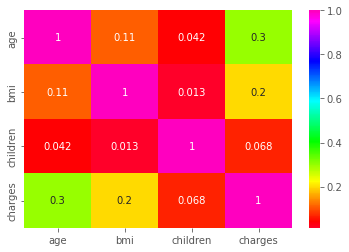

In [65]:
plt.figure()

sns.heatmap(data.corr(),annot=True,cmap='gist_rainbow',linecolor='black')


Se procede a realizar graficas de frecuencia y gráficas de pastel con las variables exo, smoker, region y children. 

En ls gráficas notamos lo siguiente: 
* EL porcentaje de hombres y mujeres que contrata el seguro de gasto médicos es similar. De hecho, varía en menos del 1\%.
* Mas del 75% de las personas son fumadoras. 
* Las regiones de las cuales provienen los contratantes del seguro están equitativamente repartidas.
* La moda del número de dependientes y/hijos asegurados es cero, los valores poco usales son 4 y 5. El resto corresponde a 2 o 3 dependientes.


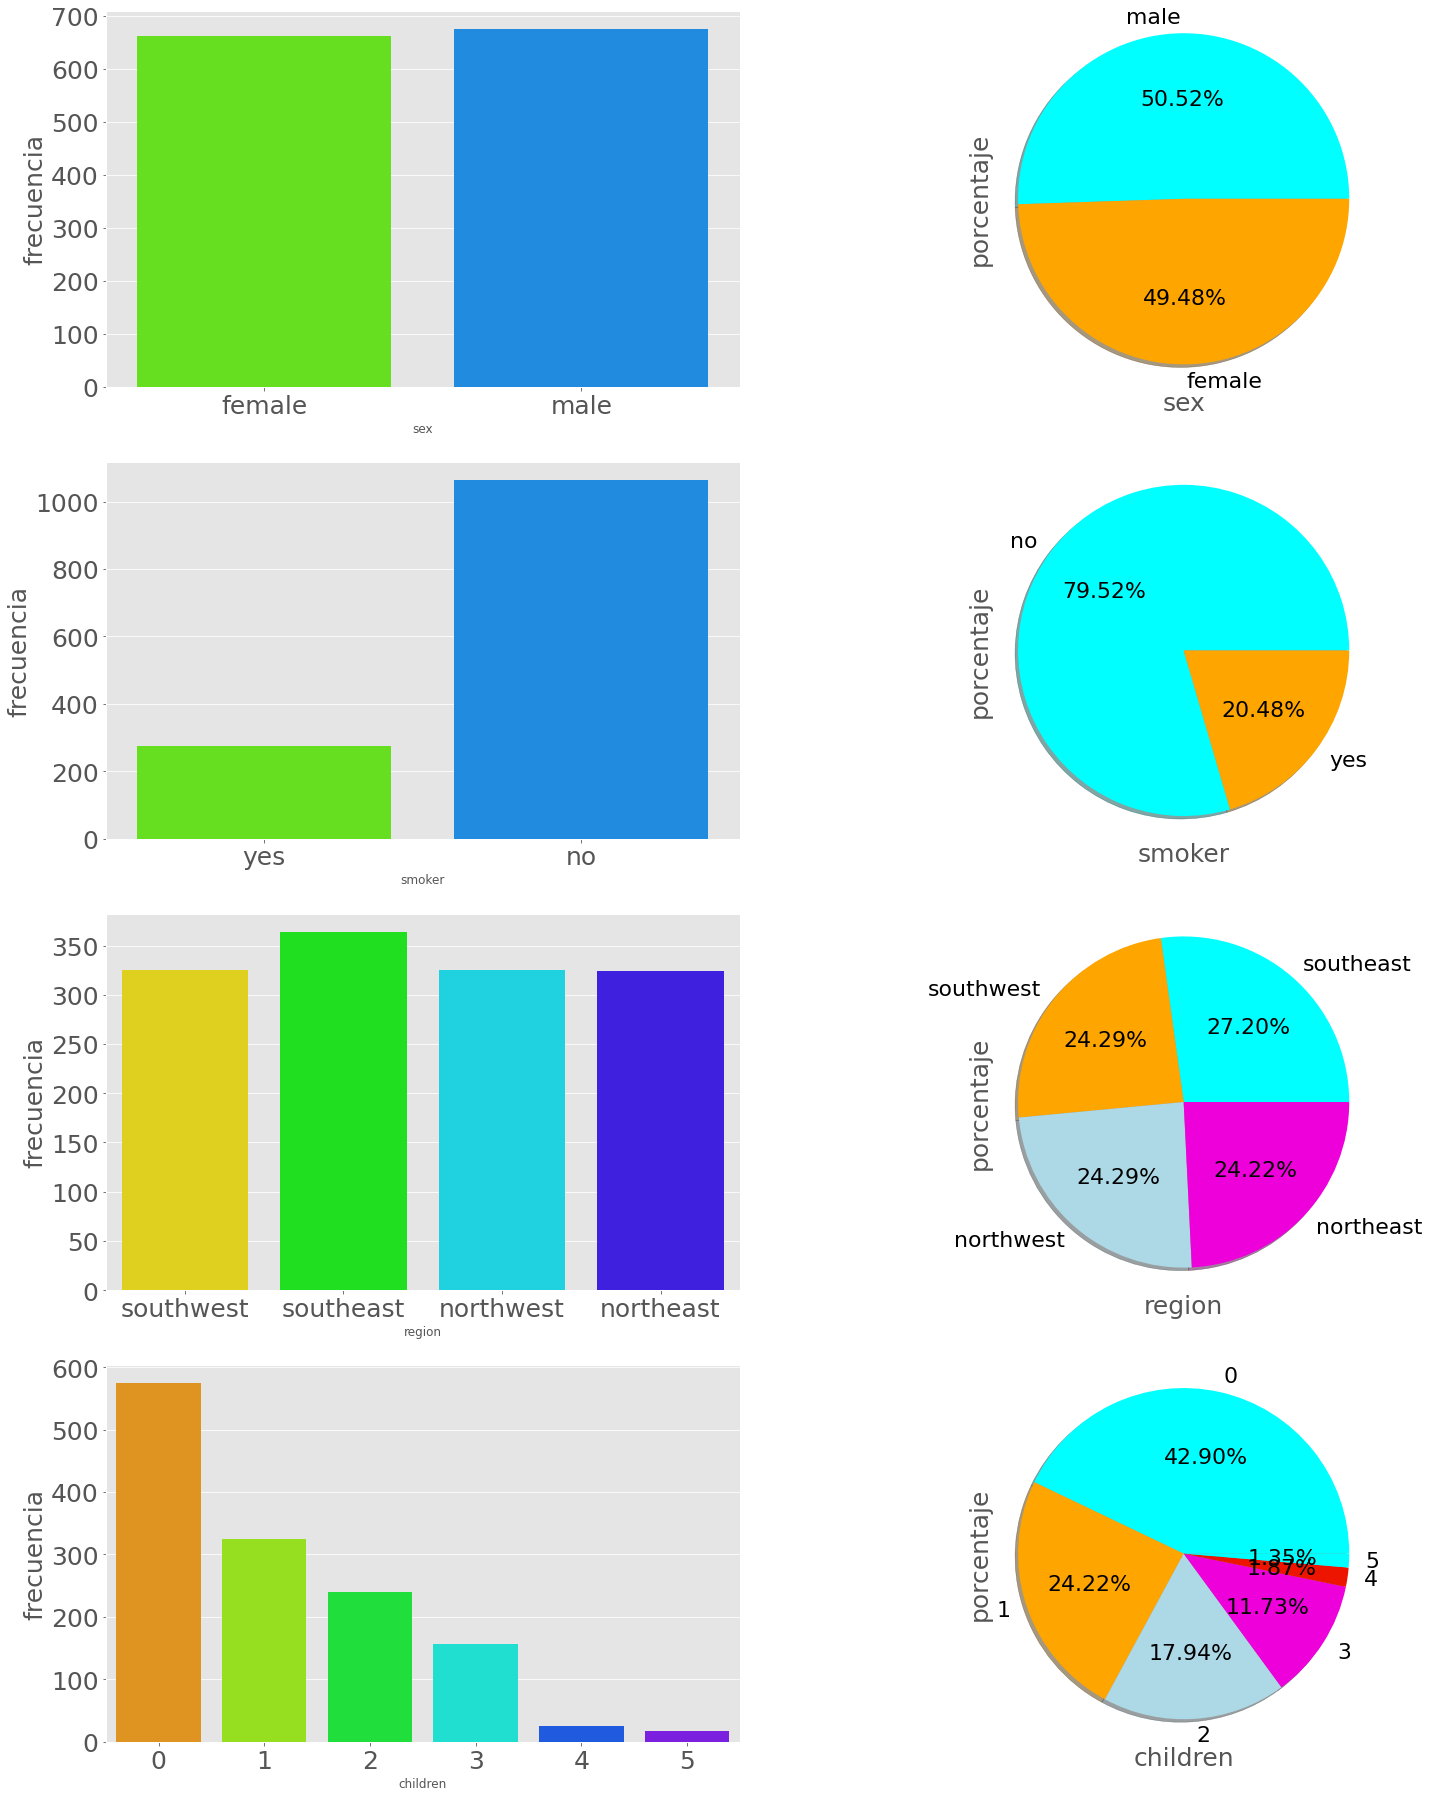

In [66]:
categorias=["sex","smoker","region","children"]
colores=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,90))
i=1
for col in categorias:
    plt.subplot(11,2,i)
    sns.countplot(data=data,x=col,palette="gist_rainbow")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col)
    plt.ylabel('frecuencia',fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    data[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colores,textprops=textprops,shadow=True, radius = 1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('porcentaje',fontsize=25)
    i=i+1

plt.show()

Ahora haremos diagramas de caja de las variables region,sex, children,smoker respecto a charges ( la cual estarmos traduciendo como facturar) . Esto con la finalidad de identificar la dispersión de los datos respecto su media.

Se puede observar lo siguientes :
* Las mujeres en promedio facturan menos que los hombres.
* Los fumadores en promedio facturan más que los no fumadores.
* La región casi no influye en el costo de la facturación, pues en todas la media es similar. 
* El número de hijos/dependientes asegurados en promedio no afecta a la facturación.

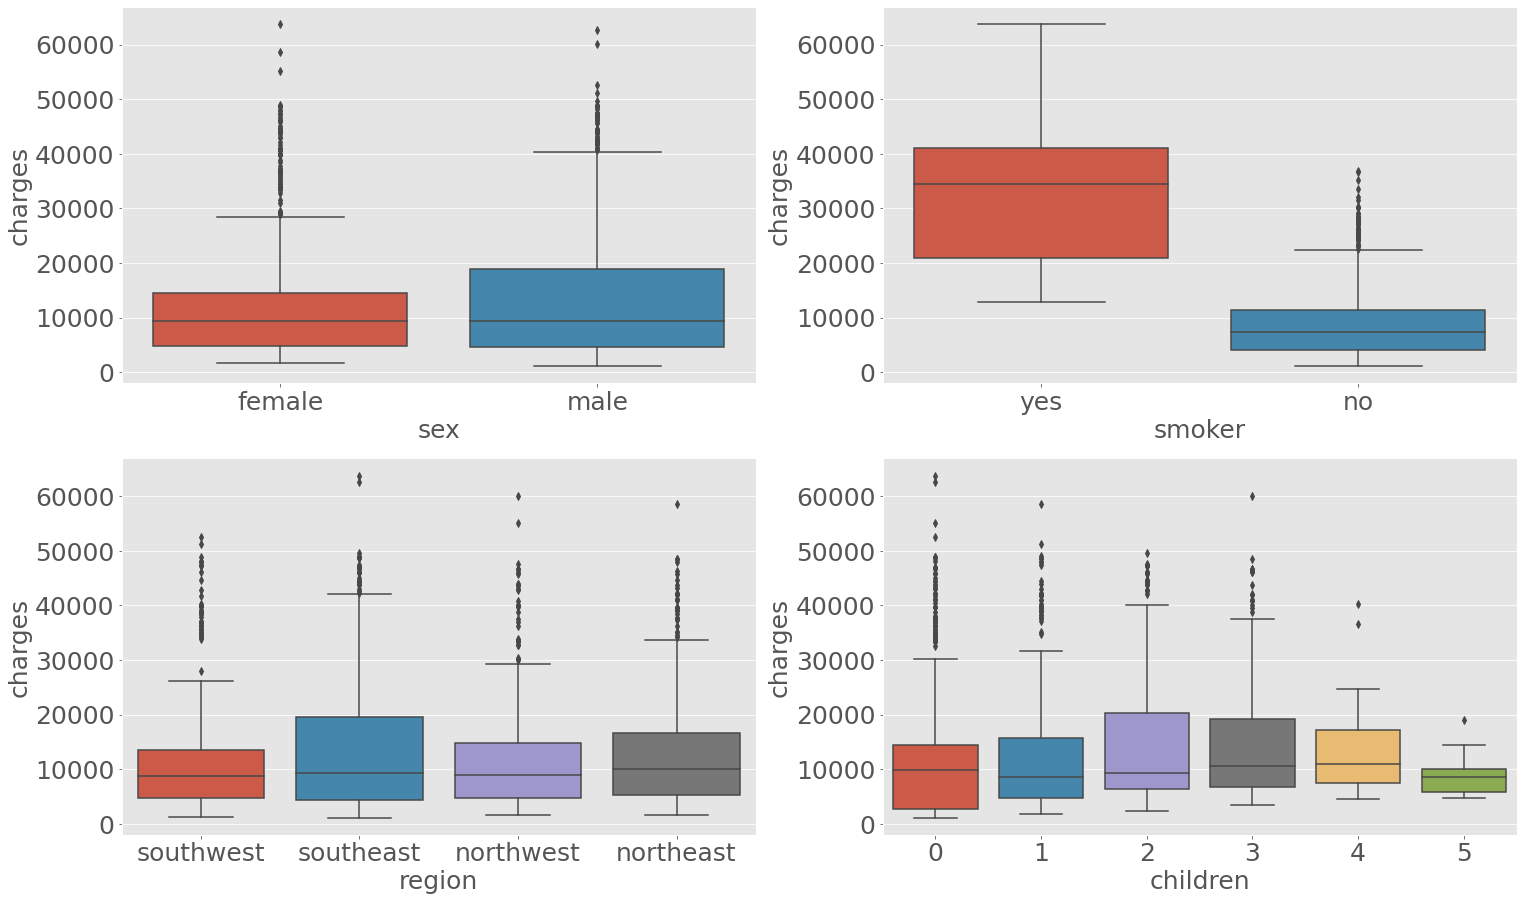

In [67]:
plt.figure(figsize=(25,90))
i=1

for col in categorias:
    plt.subplot(11,2,i)
    sns.boxplot(x=data[col],y=data['charges'])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('charges',fontsize=25)
    i=i+1

plt.show()

A continuación graficamos todos contra todos en la siguiente matriz de diagramas. Se separó por sexo para tener una mejor visualización de los datos. El color rrojo corresponde a las mujeres y el color azul a los hombres. 

De esta manera se puede corroborar lo que anteriormente se comentó. En la diagonal se encuentran las frecuencias, se observa una distribución normal en la vairbal bim.

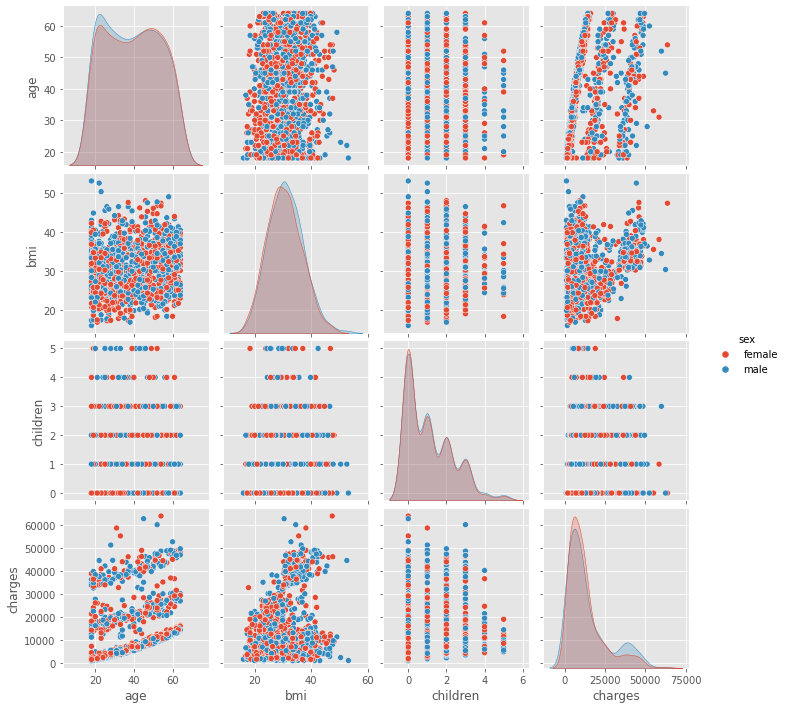

In [68]:
sns.pairplot(data,hue="sex")

De las gráficas anteriores, notamosq ue suelen haber puntos muy separados, como si fueran valores atípicos. Por ello vamos a analizar los diagrama de caja de edad,indice de masa corporal y bmi. 
Veamos si hay valores atípicos 
 

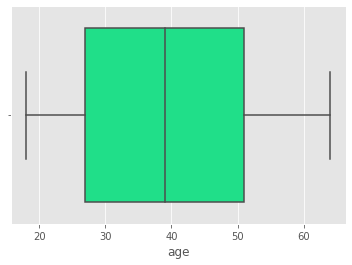

In [69]:
#Para edad
sns.boxplot(x=data['age'],palette='gist_rainbow')
#no hay valores atípicos


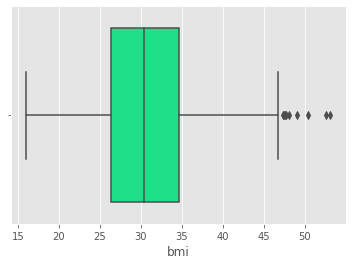

In [70]:
#Para indice de masa corporal 
sns.boxplot(x=data['bmi'],palette='gist_rainbow')
#parece ser que si hay valores atípicos

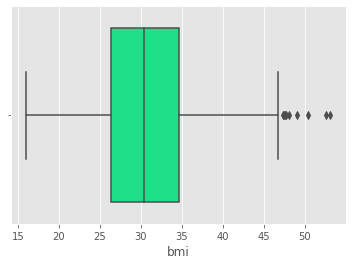

In [71]:
#Para hijos 
sns.boxplot(x=data['bmi'],palette='gist_rainbow')
#parece ser que tmabipen hay valores atípicos

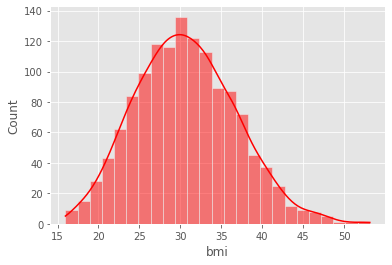

In [72]:
#Por lo anterior y esta gráfica, se decide quitar los valores atípicos de bmi
sns.histplot(x=data["bmi"],kde=True,color="red")

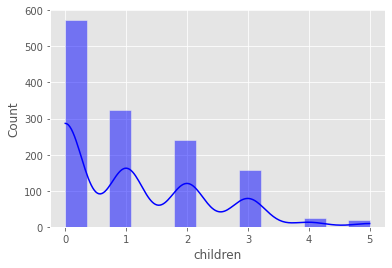

In [73]:
#También quitaremos los valoreas atípicos de hijos
sns.histplot(x=data["children"],kde=True,color="blue")

Cabe destacar que si el lector lo desea, puede correr el código sin quitar los valores atípicos de hijos, pues esto no afecta tanto al modelo, debido a lo que se comentó en la parte correpsondiente al diagrama de cajas de hijos vs charges. 
 

In [74]:
#Función para quitar los valores atípicos 
def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    #let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

        #finally, let find the outlier
    outliers=data[(data>highest) | (data<lowest)]
        

    return outliers

In [75]:
#Para remover los valores atípicos de bmi
new=pd.DataFrame(data["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(data[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    data=data.drop(test.index,axis=0)    
#en total tenemos 4 valores atípicos, notamos que los números correpsondientes de bmi a dichos 
#valores átipicos son muy altos, es decir, son personas muy obesas                   

columns name : bmi
numbers of outliers: 4


116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [76]:
#Para remover los valores atípicos de children  
new=pd.DataFrame(data["children"],columns=["children"])
for col in new.columns:
    test=outlier(data[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    data=data.drop(test.index,axis=0) 
#en general, se remueven las personas que tienen 5 hijos/dependientes. 
#notemos que son 18 de los 1338 datos que teníamos, como observamos en la grafica de pastel
#corresponde al 1.35% de los beneficiarios. 

columns name : children
numbers of outliers: 18


32      5
71      5
166     5
413     5
425     5
438     5
568     5
640     5
877     5
932     5
937     5
969     5
984     5
1085    5
1116    5
1130    5
1245    5
1272    5
Name: children, dtype: int64


#Ajustando los datos 

Primero cambiamos los datos categoricos. En este caso sex, smoker y region a valores (1,2,3,...), ocmo se muestra a continuación.

In [77]:
#Para cambiar el sexo
#0 := female 
#1 := male
data['sex']=data['sex'].astype('category')
data['sex']=data['sex'].cat.codes

#Para smoker
#0 := no
#1 := yes
data['smoker']=data['smoker'].astype('category')
data['smoker']=data['smoker'].cat.codes

#Para region
# 0 := northeast 
# 1 := northwest
# 2 := southeast
# 3 := southwest 
data['region']=data['region'].astype('category')
data['region']=data['region'].cat.codes

data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Recordemos que bmi tiene una tendecia normal y los cargos (solo una sección de elos) también por lo que se observó en las gráficas. Por simplicidad, vamos a normalizar dichos datos.

In [78]:

#Normalizar bmi
mean_bmi= data['bmi'].mean()
std_bmi=data['bmi'].std()
data['bmi']=data['bmi'].apply(lambda x: (x - mean_bmi)/std_bmi)

#Normalizar charges 
mean_charges= data['charges'].mean()
std_charges=data['charges'].std()
data['charges']=data['charges'].apply(lambda x: (x - mean_charges)/std_charges)



#Training data y test data

Con los datos limpios y ya manipulados, se procede a dividirlos en datos de entrenamiento y de prueba. 

In [79]:
msk = np.random.rand(len(data)) < 0.6 
training_data = data[msk] #el 60 % son para antrenamiento 
test_data = data[~msk] #el 40% para prueba 

print(len(training_data))
print(len(test_data))

811
505


La clase DataFrameDataset nos ayuda a obtener de manera correcta los datos que serán utilizados para estimar a nuestra variable que deseamos predecir. 

In [80]:
class DataFrameDataset(Dataset):
  def __init__(self, data, x_names:list, y_name):
    X = data[x_names]
    Y = data[y_name] # -> una columna del dataframe
    self.X = torch.from_numpy(X.to_numpy()).to(dtype=torch.float32)
    self.Y = torch.from_numpy(Y.to_numpy()).to(dtype=torch.float32)

  def __len__(self):
    return self.Y.size()[0]

  def __getitem__(self, idx):
    x = self.X[idx, :]
    y = self.Y[idx]
    return x, y



# Regresión lineal 

La clase LinearNet va a realizaar las tranformaciones afines ne cada capa neuronal que le indiquemos al igual que aplicar las funciones de activiación indicadas. 

Debido a que se tuvo problemas al realizar el modelo únicamente utilizando funciones lineales, se optó por tener a la funicón ELU y nn.Sigmoid coo funciones de activación. Se escofgió la funicón ELU porque es muy parecida a ReLU, amboas toman valores únicamente positivos , justo como los cargos, pero la diferencia es que ELU sube más suave que ReLU. Por otro lado, Sigmoid nos ayuda a que los valores no se disparen. 

In [81]:
class LinearNet(nn.Module):
  def __init__(self,n_in, n_out):
    super(LinearNet, self).__init__()

    ## transformaciones afines: z = Wx + b
    self.layer1 = nn.Linear(in_features=n_in, out_features=16, bias=True)
    self.layer2 = nn.Linear(in_features=16, out_features=16, bias=True)
    self.layer3 = nn.Linear(in_features=16, out_features=n_out, bias=True)

    self.fc1 = nn.ELU()
    self.fc2 = nn.Sigmoid()

    self.in_features = n_in

  def forward(self, x):
    x = self.layer1(x)
    x = self.fc1(x)
    x = self.layer2(x)
    x = self.fc2(x)
    x = self.layer3(x)
    return x


In [82]:
#Usamos la clase DataFrameDataset para utilizar correctamente los datos de entrenamiento y prueba
x_names = ['age','sex','bmi','children','smoker','region']
train_set = DataFrameDataset(training_data, x_names, 'charges')
test_dataset = DataFrameDataset(test_data, x_names, 'charges')

In [83]:
#Ahora de los datos de prueba, vamos a obtener los datos de validación, los cuales e´ran el 60% de los de prueba.
msk = np.random.rand(len(test_dataset)) < 0.6
val_set = torch.utils.data.Subset(test_dataset, np.where(msk)[0])
test_set = torch.utils.data.Subset(test_dataset, np.where(~msk)[0])
n_test = len(test_set)

In [84]:
#Definimos el bach size, como son pocos datos (menos de 1338 pues ya se limpió la base), entonces tendremos batvch de tamaño 1
batch_size = 1
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=n_test)


In [85]:
#Definimos el modelo
model = LinearNet(6,1)
model

LinearNet(
  (layer1): Linear(in_features=6, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (fc1): ELU(alpha=1.0)
  (fc2): Sigmoid()
)

In [86]:
#Funcion de costos
cost = nn.MSELoss()
#Optimizador que tuiliza el método del gradiente 
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.0, nesterov=False)

# Entrenamiento 

Reutilizamos el código de udpate_parameters vistoe n clase para que en cada iteración los pesos sean mejores y se pueda ir optimizando nuestra fución objetivo (la funicón de costos ). 

In [87]:
def update_parameters(model, dataloader, optimizer, criterion, train=True):
  running_loss = 0.0
  for i, data in enumerate(dataloader, 0):
    X, Y = data
    n = len(X) #numero de parametros que van a estimar a Y
    X = X.reshape((n, model.in_features)) # Corrección de tamaño, sólo es necesario en dim=1
    m = len(Y)
    Y = Y.reshape((m, 1)) # -> Corrección de tamaño
    if train: 
      optimizer.zero_grad() # reinicia el gradiente
    pred = model(X) # forward pass 
    loss = criterion(pred, Y) # evaluación de predicción
    if train:
      loss.backward() # cálcula las derivadas 
      optimizer.step() # paso de optimización 

    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
  return avg_loss

Por último, vamos a tener 100 epocas y cada 5 epócas vamos a imprimir las per´didas en el entrenamiento y en los datos de validación para ver si nuestro modelos está funcionando. 

In [88]:
epoch_loss = list()
val_loss = list()
epochs = 100

for epoch in range(epochs):
  loss_train = update_parameters(model, train_dataloader, optimizer, cost)
  loss_val = update_parameters(model, val_dataloader, None, cost, train=False)
  epoch_loss.append(loss_train)
  val_loss.append(loss_val)
  if epoch % 5 == 0:  
    print('epoch {}, train loss {}, val loss {}'.format(epoch, loss_train, loss_val))

epoch 0, train loss 1.065821382245472, val loss 0.9262013005589695
epoch 5, train loss 0.9558943914864796, val loss 0.7648612171358112
epoch 10, train loss 0.8462011241920571, val loss 0.7955538992135371
epoch 15, train loss 0.7982625447063915, val loss 0.5903992929634836
epoch 20, train loss 0.7236636580192274, val loss 0.48870538949085723
epoch 25, train loss 0.6866190595063647, val loss 0.9802511433290325
epoch 30, train loss 0.6201347598725363, val loss 1.1957583023980622
epoch 35, train loss 0.5655277057240184, val loss 0.2952709752492734
epoch 40, train loss 0.548100661607006, val loss 0.43231016271171907
epoch 45, train loss 0.5257763958007222, val loss 0.258200605259171
epoch 50, train loss 0.47610648690437696, val loss 0.1840877108155521
epoch 55, train loss 0.42468412088360546, val loss 0.21420642572489498
epoch 60, train loss 0.5259177259933849, val loss 0.33975707160040725
epoch 65, train loss 0.4088930704005684, val loss 0.1789627748441189
epoch 70, train loss 0.4698618223

Notmaos que los valores de pérdida en el entrenamiento como en la evaluación son pequeños, entonces parece ser que nuestro modelo propuesto funciona.  No obstante, auqnue los valores de pérdida para los datos de validación y anternamiento son pequeño, aún podrían ser más pequeños con otros modelos. 

A continuación se presenta una gráfica con los valores de pérdida de entrenamiento y también se encuentran los de validación. 

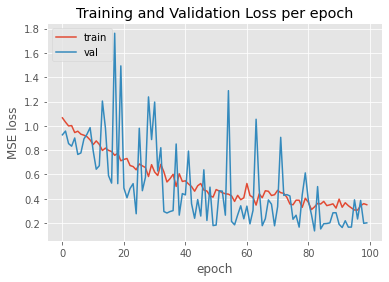

In [91]:
plt.plot(epoch_loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss per epoch')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Finalmente, calculamos el error de prueba, que tmabién es pequeño :) 

In [90]:
data = next(iter(test_dataloader))
X, Y = data
n = len(Y)
Y = Y.reshape((n, 1)) # -> Corrección de tamaño
pred = model(X)
error = cost(Y, pred)
print('error de prueba :{}'.format(error.item()))

error de prueba :0.23232847452163696
